In [1]:
users_number = 12000
restaurants_number = 1250
polygon_points = 4

In [2]:
import csv
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, Point
import geopandas

%matplotlib inline

In [3]:
df = pd.read_csv('yandex_restaurants.csv', sep=';')
df['coordinates'] = list(zip(df.loc_lon, df.loc_lat))
restaurant_points = df.groupby('place_id')['coordinates'].apply(lambda x : x.values.tolist())
restaurant_polygons = {'geometry': []}
for polygon_points in restaurant_points:
    restaurant_polygons['geometry'].append(Polygon(polygon_points))
restaurant_points = geopandas.GeoDataFrame(restaurant_polygons)
print('RESTAURANTS:\n', restaurant_points)
restaurant_points.to_csv('restaurants_coordinates.csv', index=False)

RESTAURANTS:
                                             geometry
0  POLYGON ((37.78707 55.74702, 37.78433 55.75171...
1  POLYGON ((37.45831 55.80389, 37.46405 55.80868...


In [4]:
# generating random user points distributed normally prior to the city center

users_lat = np.random.normal(55.753768, 0.15, users_number)
users_lon = np.random.normal(37.621326, 0.15, users_number)
lat_lon = pd.DataFrame()
lat_lon['loc_lat'] = pd.Series(users_lat)
lat_lon['loc_lon'] = pd.Series(users_lon)

user_points = geopandas.GeoDataFrame(
    geometry=geopandas.points_from_xy(lat_lon.loc_lon, lat_lon.loc_lat), crs = 'epsg:4326')
print('USERS:\n', user_points)
user_points.to_csv('users_coordinates.csv', index=False)

USERS:
                         geometry
0      POINT (37.80692 55.66624)
1      POINT (37.58211 55.85444)
2      POINT (37.60134 55.47739)
3      POINT (37.53802 55.73961)
4      POINT (37.67318 55.66090)
...                          ...
11995  POINT (37.62386 55.71447)
11996  POINT (37.54491 55.97506)
11997  POINT (37.58229 55.93228)
11998  POINT (37.71491 55.75191)
11999  POINT (37.60275 56.13656)

[12000 rows x 1 columns]


In [5]:
# need to generate random similar polygons, not sure how to perform the task

#places = np.array(range(1,restaurants_number + 1))
#place_id = np.repeat(places, polygon_points, axis=0)
#points = np.array(range(0,polygon_points))
#point_number = np.tile(points, restaurants_number)
#place_zone = pd.DataFrame()
#place_zone['place_id'] = pd.Series(place_id)
#place_zone['point_number'] = pd.Series(point_number)

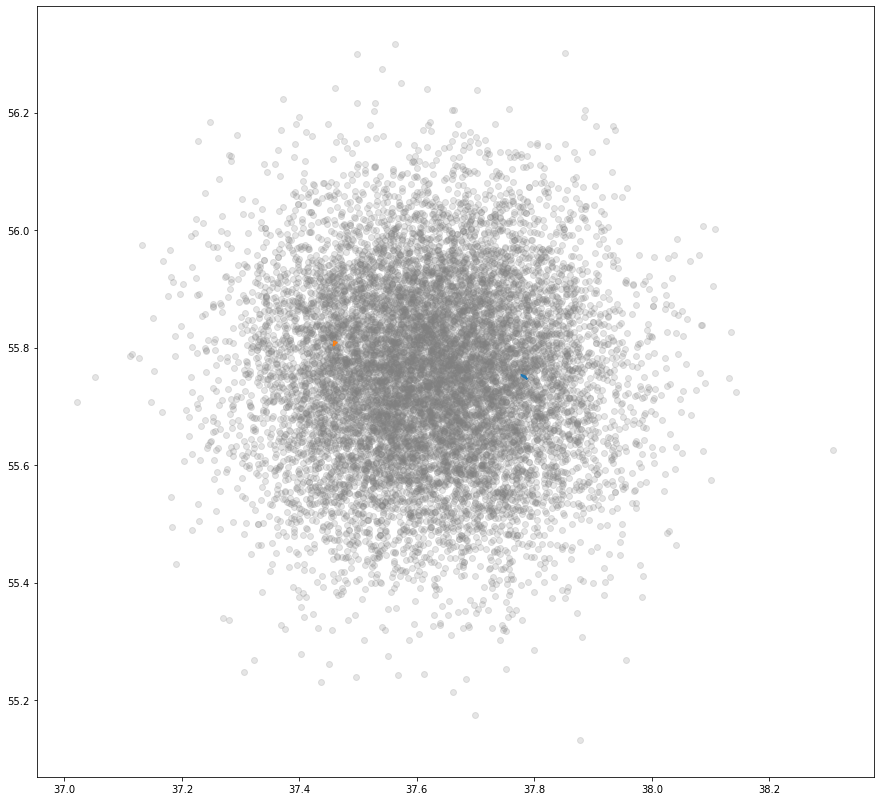

In [6]:
fig, ax = plt.subplots(figsize = (15, 15))
user_points['geometry'].plot(ax = ax, alpha = 0.2, color = 'grey')
for i in restaurant_polygons['geometry']:
    x,y = i.exterior.xy
    plt.plot(x, y)
plt.show()

Пример. Ссылка на визуализацию с помощью сервиса Carto:
https://chrkv.carto.com/builder/cc730eb3-b451-4bbb-aca9-13e68a60fcff/embed

In [7]:
# counting the number of restaurants available for each user

import operator

user_restaurant_number = dict((user_id, 0) for user_id in user_points.index)
for index_user, row_user in user_points.iterrows():
    for index_restaurant, row_restaurant in restaurant_points.iterrows():
        if row_user['geometry'].within(row_restaurant['geometry']) or row_restaurant['geometry'].touches(row_user['geometry']):
            user_restaurant_number[index_user] += 1
sorted_user_restaurant_number = dict(sorted(user_restaurant_number.items(), key=operator.itemgetter(1),reverse=True))

In [8]:
user_restaurant = pd.DataFrame.from_dict(sorted_user_restaurant_number, orient='index', columns=['number_of_places_available'])
print(user_restaurant)

       number_of_places_available
268                             1
5557                            1
6626                            1
9204                            1
9692                            1
...                           ...
11995                           0
11996                           0
11997                           0
11998                           0
11999                           0

[12000 rows x 1 columns]
